In [1]:
import numpy as np
import matplotlib.pyplot as plt

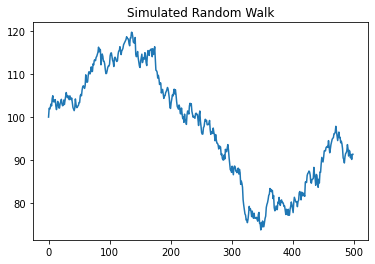

In [2]:
# generating 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
#np.cumsum(steps) gives the cumulative sum of all values starting from 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()





## Adding Drifts on price
Now we look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.

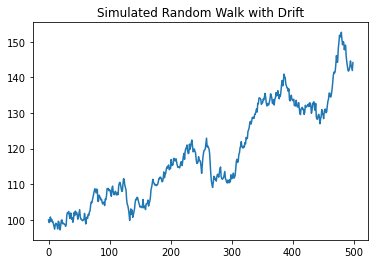

In [3]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

This simulated price series  plotted should closely resemble a random walk for a high flying stock..

## Are Stock Prices a Random Walk?

Most stock prices follow a random walk (perhaps with a drift). Now we will look at a time series of KBL stock prices, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.


With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [4]:
import pandas as pd
KBL=pd.read_csv('datasets/kbl price from 2015.csv')


In [5]:
# Importing the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Running the ADF test on the price series and print out the results
results = adfuller(KBL['Closing Price'])
print(results)

#  printing out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(-1.7157655703081625, 0.42300843283901657, 18, 1248, {'1%': -3.4356006420838963, '5%': -2.8638586845641063, '10%': -2.5680044958343604}, 9001.852872399793)
The p-value of the test on prices is: 0.42300843283901657


The P-value of the test if far greater than 0.05 , so we cannot reject the null Hypothesis that the Stock Price is a random walk.

Hence, the stock price is a random walk.

## How About Stock Returns?
Above we showed that KBL stock prices follow a random walk. Now we will do the same thing for KBL returns (percent change in prices) and show that the returns do not follow a random walk.

In [6]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
KBL_return = KBL['Closing Price'].pct_change()

# Eliminate the NaN in the first row of returns
KBL_return = KBL_return.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(KBL_return)
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 6.813408123605418e-15


The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

### Therefore , we can say that Stock Returns are not a random walk

# What is stationary?
It means that the joint distribution of the observation do not depend on time..

or Simple, it means that the mean , variance and autocorrelation of the observation do not depend on time.

### We, will take the stock price of KBL as it is a Random walk .And we know random walk is an non-stationary series

In [7]:
kbl_price=KBL['Closing Price']

Text(0.5, 1.0, '')

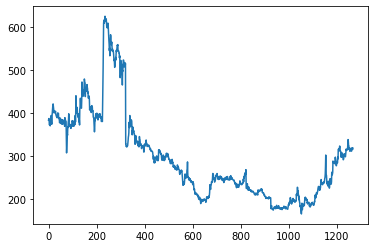

In [8]:
plt.plot(kbl_price)
plt.title("")

### But, if we take the first difference of the KBL price, the new series is White noise, which is a Stationary series

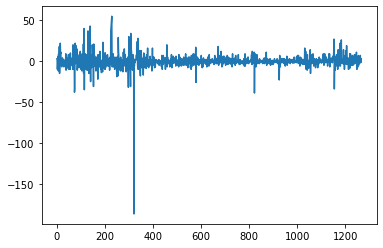

In [9]:
plt.plot(kbl_price.diff())